# Problem Statement:

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [19]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# loading data
encodings = ["utf-8", "iso-8859-1", "cp1252"]
for encoding in encodings:
    try:
        dataset = pd.read_csv('ToyotaCorolla.csv', encoding=encoding)
        print(f"CSV file read successfully with {encoding} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with {encoding} encoding. Trying another encoding...")

dataset.head()

Failed to read CSV file with utf-8 encoding. Trying another encoding...
CSV file read successfully with iso-8859-1 encoding.


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Data Exploration:

In [21]:
dataset.shape

(1436, 38)

In [22]:
# Assuming 'dataset' is your DataFrame
selected_columns = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight", "Price"]
data = dataset[selected_columns]
data=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [23]:
data.tail()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250
1435,76,1,110,1600,5,5,19,1114,6950


In [24]:
data.sample(5)

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
1282,80,73200,110,1600,5,5,85,1070,7500
553,50,41273,97,1400,5,5,85,1060,10995
1192,77,90000,86,1300,3,5,69,1015,6750
418,55,94401,72,2000,3,5,185,1115,8950
1212,72,86860,110,1600,5,5,85,1075,8250


## Quick Data Check

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1436 non-null   int64
 1   KM      1436 non-null   int64
 2   HP      1436 non-null   int64
 3   CC      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   QT      1436 non-null   int64
 7   Weight  1436 non-null   int64
 8   Price   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## Statistical Summary

In [26]:
data.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [27]:
data.nunique()

Age         77
KM        1263
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
Price      236
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [28]:
duplicated_rows = data[data.duplicated()]

print(duplicated_rows)

     Age     KM   HP    CC  Doors  Gears   QT  Weight  Price
113    8  13253  116  2000      5      5  234    1320  24950


In [29]:
data.drop_duplicates(keep='first', inplace=True)

In [30]:
data.reset_index(drop=True, inplace=True)

In [31]:
data.shape

(1435, 9)

### Identifying Missing Values

In [32]:
data.isna().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

- There is no missing values in dataset.

### Identifying Outliers

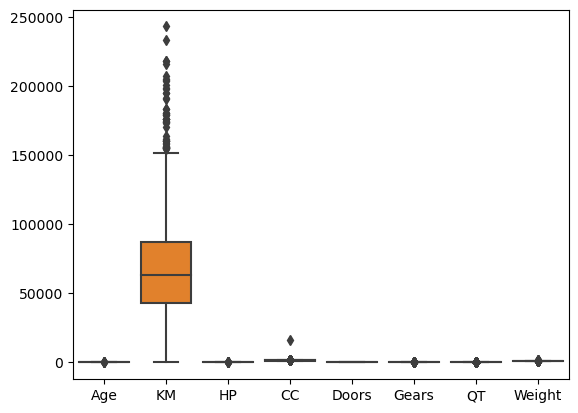

In [33]:
sns.boxplot(data=data.drop('Price',axis=1));

- With the above box plot we can see there are a lot of outliers present in the dataset but due to loss of information, we keep outliers as it is.

# Data Visualization

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


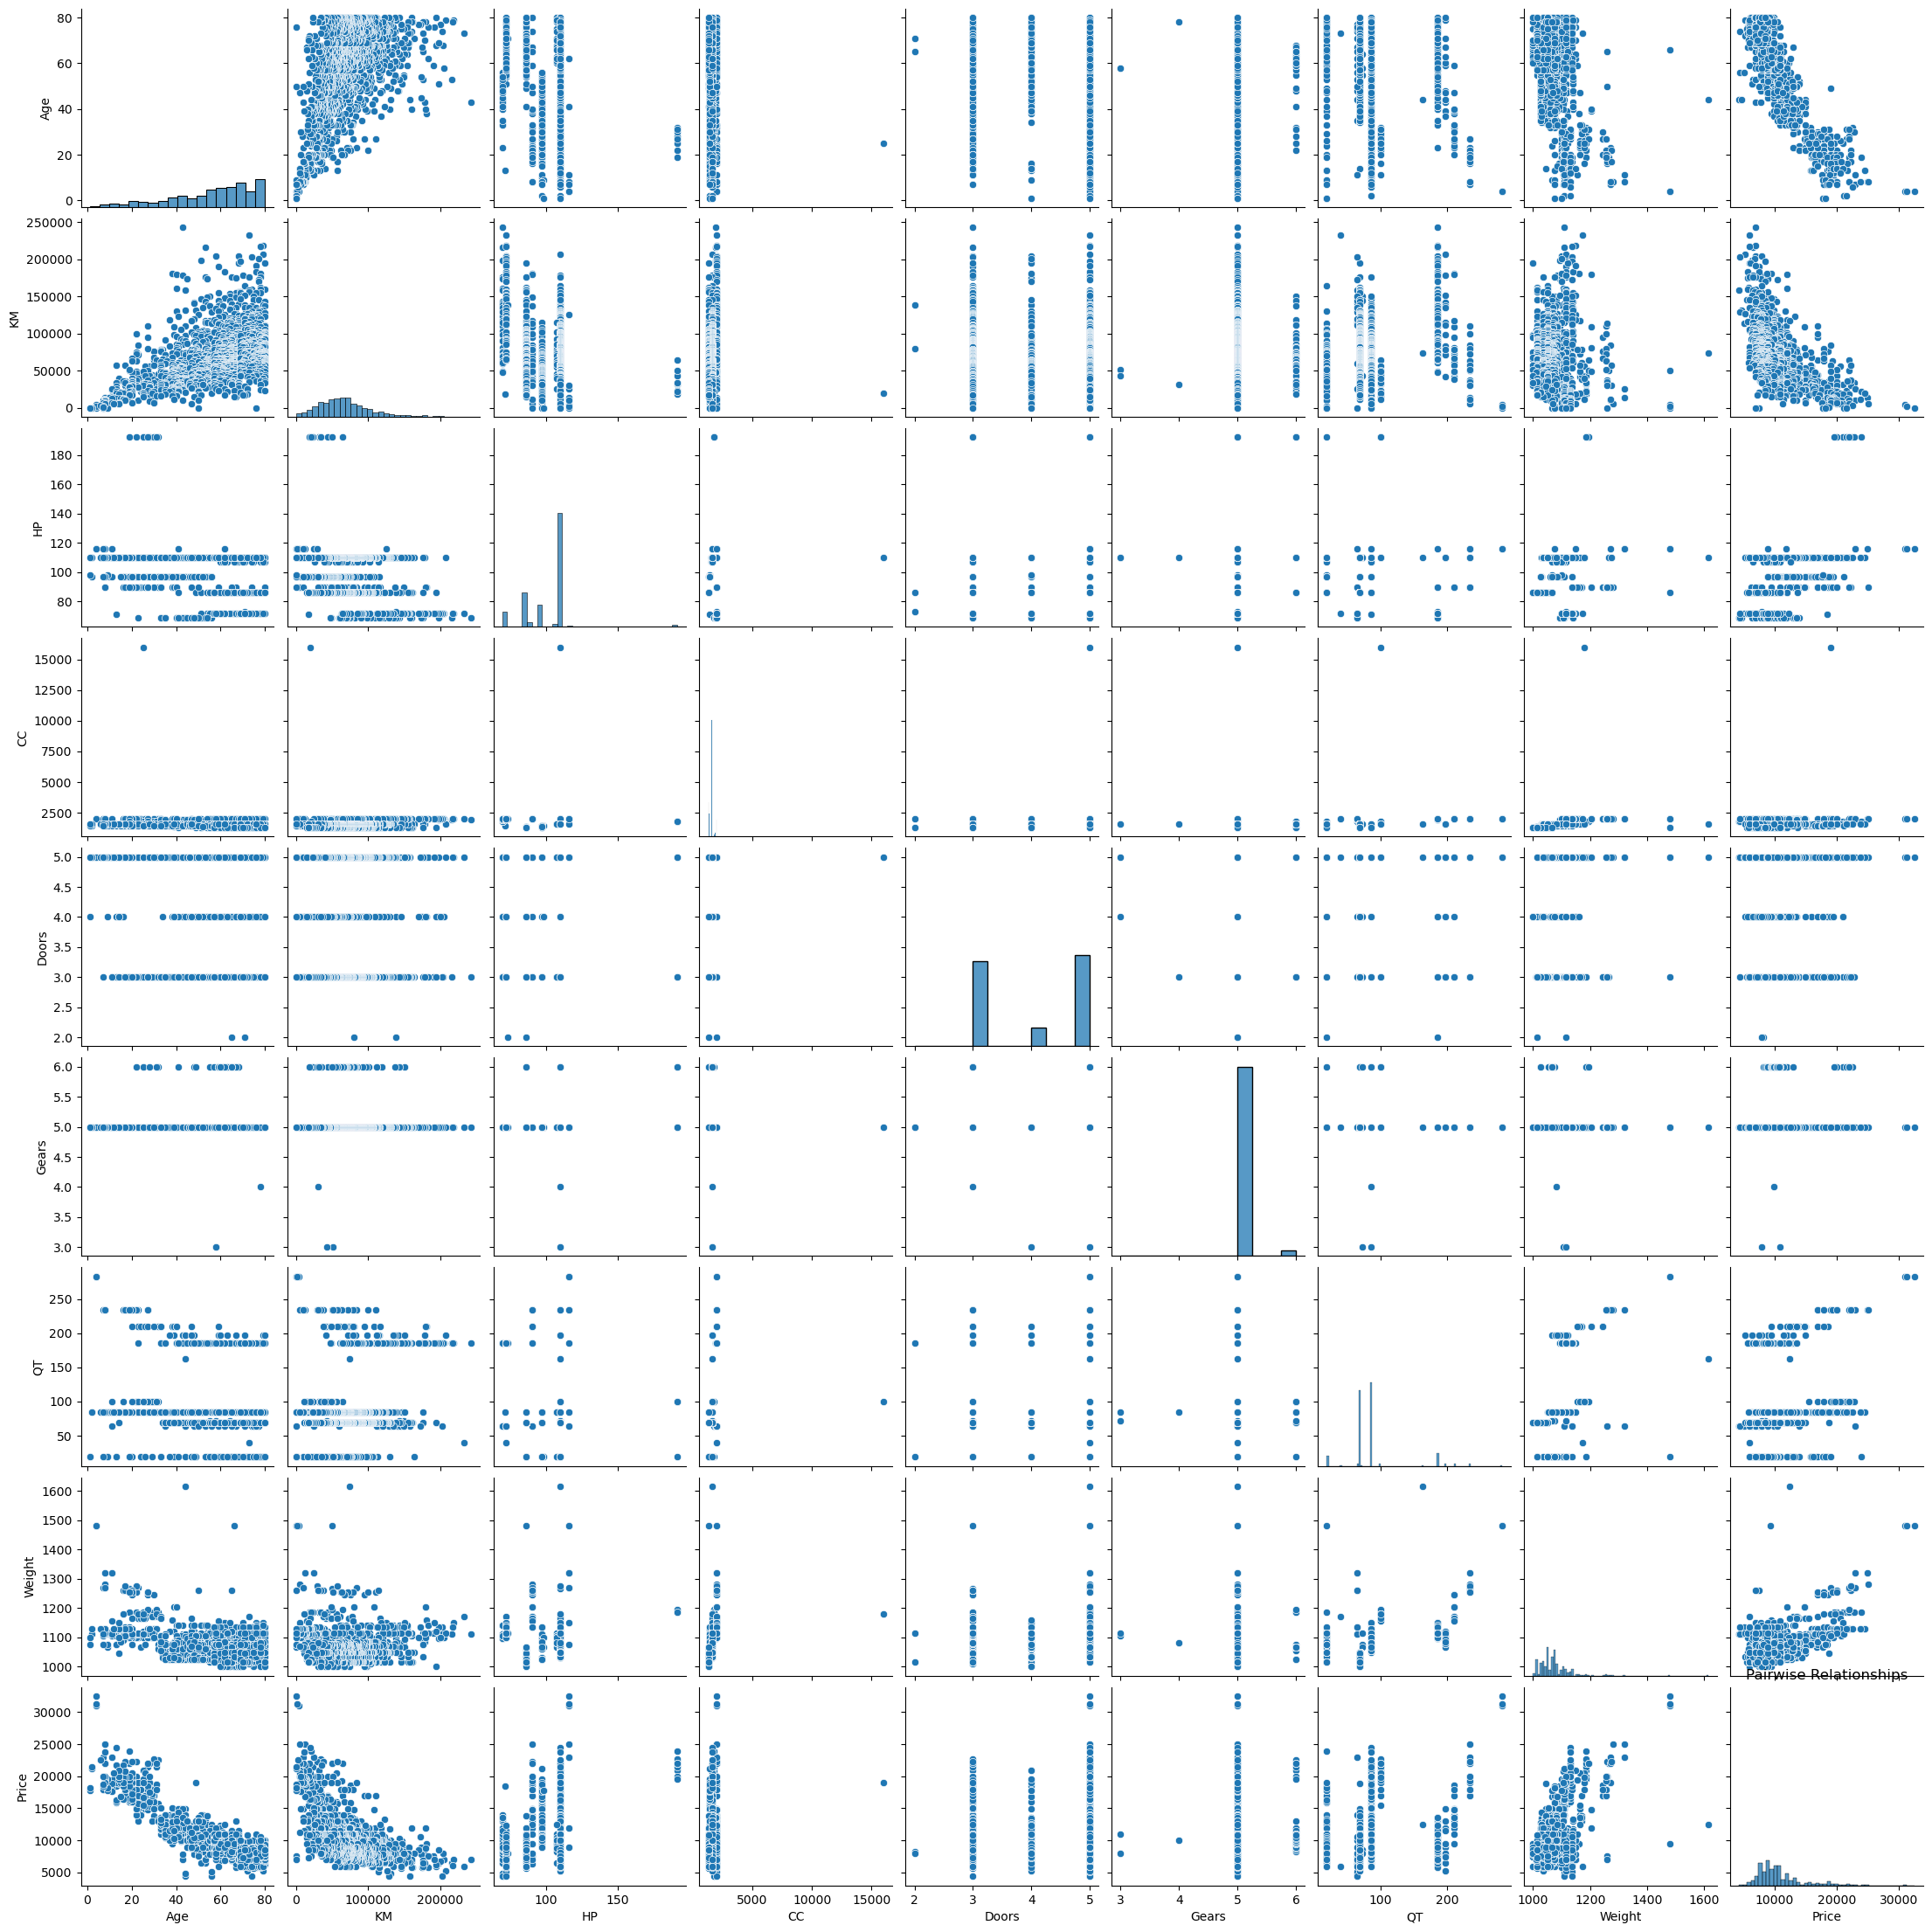

In [34]:
sns.pairplot(data)
plt.title("Pairwise Relationships")
plt.show()

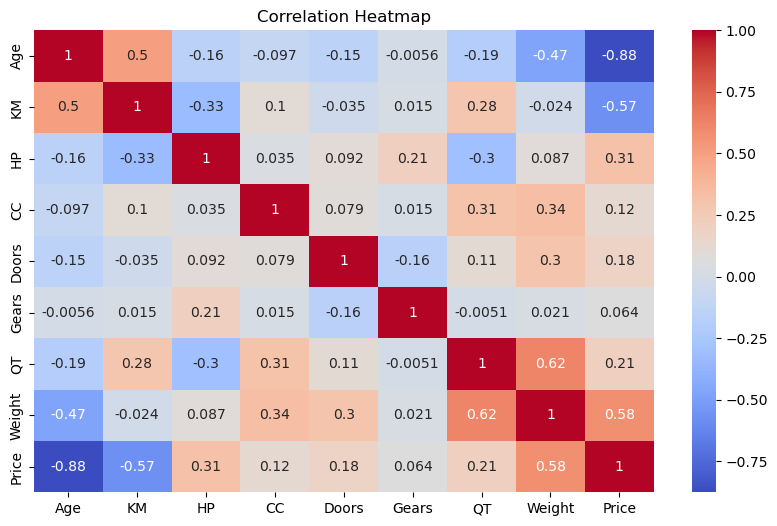

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

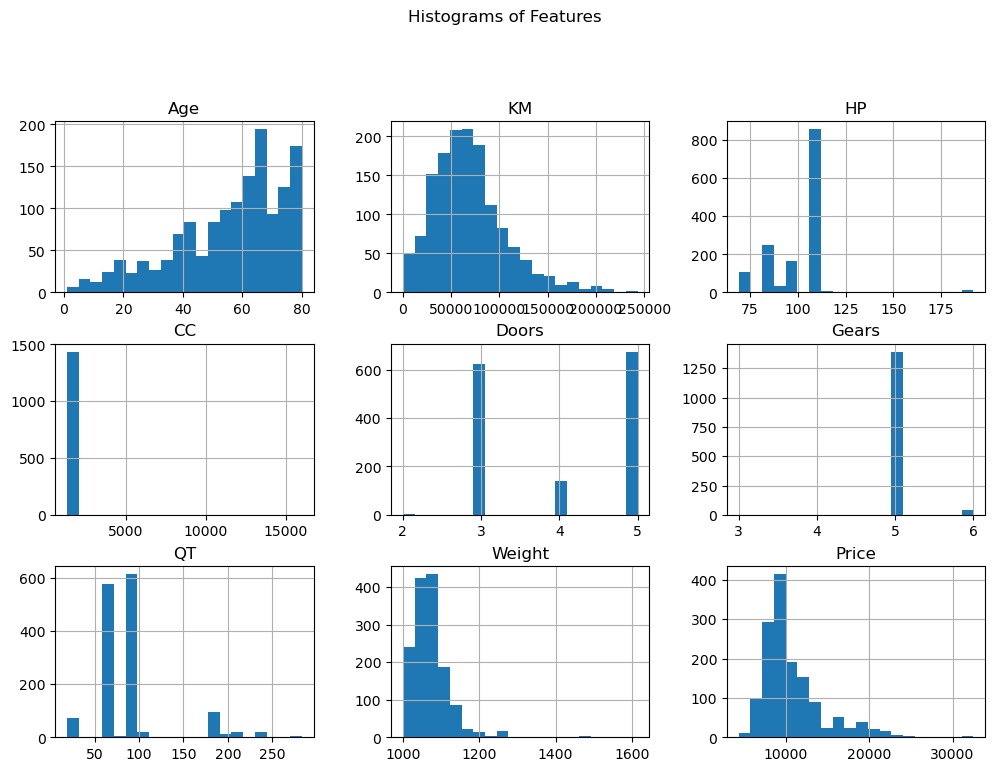

In [36]:
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Features", y=1.02)
plt.show()

<Axes: xlabel='Price', ylabel='HP'>

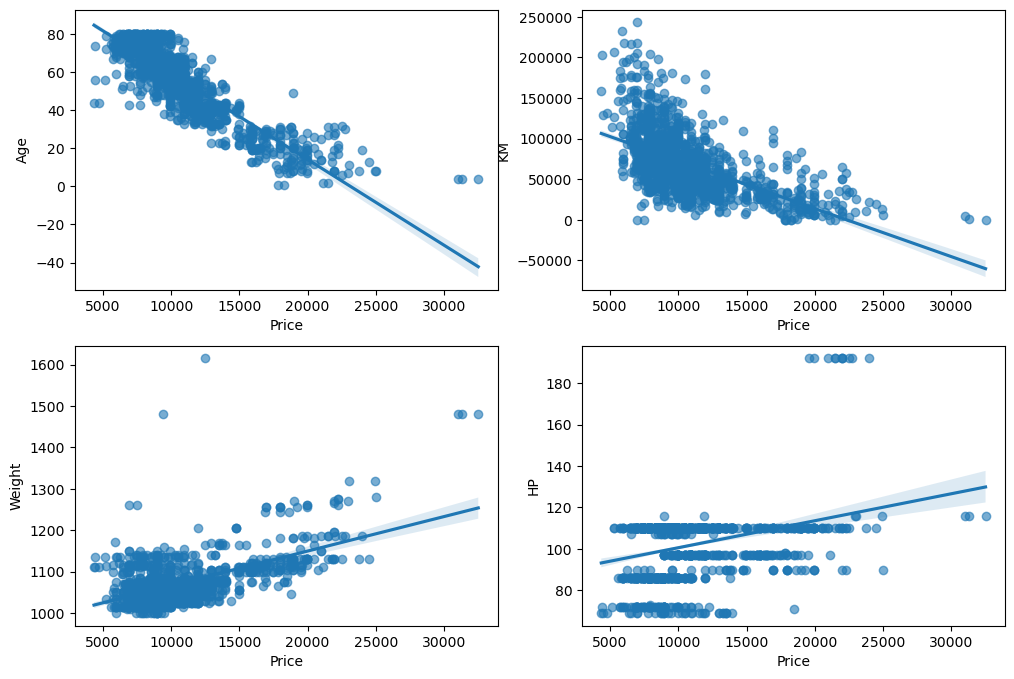

In [37]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age', data = data, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = data, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = data, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = data, scatter_kws={'alpha':0.6}, ax = axes[1,1])

# Data Splitting

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Model Selection - Sklearn

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

# Model Evaluation

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1044.3798007816304
Mean Squared Error (MSE): 1984130.7767104763
Root Mean Squared Error (RMSE): 1408.5917707804758
R-squared (R2): 0.843283695277127


# Model Selection - OLS

In [46]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):                        0.00
Time:                        20:24:36   Log-Likelihood:                         -12374.
No. Observations:                1435   AIC:                                  2.476e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -125.4366      2.444    -51.332      0.000    -130.230    -120.643
KM            -0.0204      0.001    -16.239      0.000      -0.023      -0.018
HP            33.3304      2.795     11.925      0.000      27.848      38.813
CC            -0.1007      0.090     -1.114      0.265      -0.278       0.077
Doors         -6.3603     40.159     -0.158      0.874     -85.138      72.417
Gears         92.5332    148.382      0.624      0.533    -198.537     383.604
QT             5.6875      1.229      4.629      0.000       3.277       8.098
Weight        13.9761      0.773     18.081      0.000      12.460      15.492
==============================================================================
Omnibus:                      109.540   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.984
Skew:                           0.030   Prob(JB):                    6.24e-125
Kurtosis:                       6.092   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- While the model's R-squared value and p-value indicate a good overall fit,
- it's important to note that not all individual variables have statistically significant p-values.
- This suggests the presence of multicollinearity, which may be impacting the interpretation of individual coefficient values within the model.

## Solving Multicollinearity

## Finding Cook's Distance

In [49]:
infl = model.get_influence()

In [50]:
summ_df = infl.summary_frame()

In [51]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age,dfb_KM,dfb_HP,dfb_CC,dfb_Doors,dfb_Gears,dfb_QT,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.287213,-2.338772e+00,-2.772129,2.600592e+01,0.644975,9.124783e-01,-4.265825,-3.598188,8.153999e+01,7.633772,0.917992,25.540555,7.791853,26.069452
220,-0.253511,-2.144529e-02,0.170037,4.179101e-01,0.552787,1.569527e+00,0.547497,-1.686047,3.705074e-01,-6.126430,0.073192,-1.721644,-6.206448,-1.744131
959,-0.208003,3.842423e-02,0.441589,1.977091e-01,0.538733,9.935350e-01,0.783167,-1.261203,2.074678e-01,-4.094812,0.090070,-1.288310,-4.117639,-1.295492
109,0.105225,-3.011852e-01,0.119567,-1.942458e-01,-0.224095,-6.191548e-01,0.343401,0.569500,1.272359e-01,5.002263,0.039089,1.008904,5.044938,1.017511
600,-0.212757,3.193334e-01,0.383540,-1.100947e-01,0.404348,5.515317e-01,0.426138,-0.747833,9.669677e-02,-5.588608,0.024170,-0.879531,-5.648809,-0.889005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.000150,1.669291e-05,0.000127,2.853871e-05,0.000018,-3.168636e-05,0.000020,-0.000046,1.023153e-08,0.006055,0.002228,0.000286,0.006053,0.000286
1432,-0.000146,1.981292e-04,0.000111,1.291516e-05,0.000055,-3.930528e-05,-0.000027,-0.000012,7.995082e-09,-0.003154,0.006388,-0.000253,-0.003153,-0.000253
481,-0.000003,2.194602e-07,-0.000055,2.748043e-07,-0.000105,8.474484e-06,-0.000017,0.000030,3.510541e-09,-0.004154,0.001625,-0.000168,-0.004152,-0.000168
88,0.000057,-2.369949e-05,0.000015,1.400674e-05,0.000038,2.522483e-07,0.000027,-0.000027,7.975656e-10,-0.001038,0.005888,-0.000080,-0.001038,-0.000080


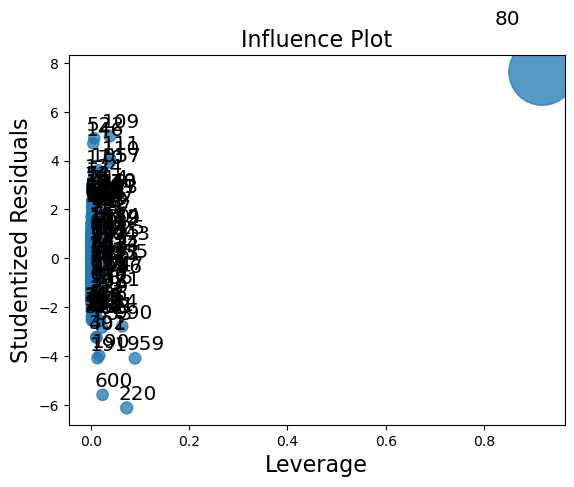

In [53]:
infl.plot_influence();

- Index 80 has highest Cook's Distance.
- it will be wise to drop this row from the data set

In [64]:
data1 = data.drop(data.index[[80]],axis=0).reset_index()
data1 = data1.drop(['index'],axis=1)              #Drop the original index
data1.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


## Finding Variance Inflation Factor (VIF)

In [54]:
vif = pd.DataFrame()

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [58]:
vif["features"] = X.columns

In [59]:
vif.round(1)

,VIF Factor,features
0,16.4,Age
1,7.6,KM
2,64.9,HP
3,17.2,CC
4,21.9,Doors
5,439.7,Gears
6,11.0,QT
7,543.5,Weight


- Our analysis reveals that Geras and Weight have a high variance inflation factor (VIF), indicating significant collinearity.
- This suggests that these features share redundant information and may be capturing similar aspects of the data's variance.
- To address this multicollinearity and potentially improve model performance, we may need to consider removing one of these features.

In [60]:
# Removed Weight fron the dataframe and Tested the model
new_df = data.drop("Weight", axis=1)

In [62]:
new_model = sm.OLS(y, new_df).fit()
new_predictions = new_model.predict(new_df)

In [63]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.542e+32
Date:                Tue, 27 Feb 2024   Prob (F-statistic):                        0.00
Time:                        20:32:37   Log-Likelihood:                          34626.
No. Observations:                1435   AIC:                                 -6.924e+04
Df Residuals:                    1427   BIC:                                 -6.919e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age        -2.487e-14   2.37e-14     -1.049      0.294   -7.14e-14    2.16e-14
KM         -2.667e-17   8.06e-18     -3.311      0.001   -4.25e-17   -1.09e-17
HP         -8.349e-14   1.75e-14     -4.779      0.000   -1.18e-13   -4.92e-14
CC          1.665e-15   5.32e-16      3.130      0.002    6.22e-16    2.71e-15
Doors       5.684e-14   2.25e-13      0.253      0.800   -3.84e-13    4.98e-13
Gears      -1.052e-12   5.58e-13     -1.885      0.060   -2.15e-12    4.26e-14
QT         -3.109e-15   6.79e-15     -0.458      0.647   -1.64e-14    1.02e-14
Price          1.0000   1.43e-16   7.02e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      466.712   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.579
Skew:                          -1.498   Prob(JB):                         0.00
Kurtosis:                       7.960   Cond. No.                     2.07e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deployment

In [23]:
# from joblib import dump,load

In [24]:
# dump(lasso_cv_model, 'final_lasso_cv_model.joblib')